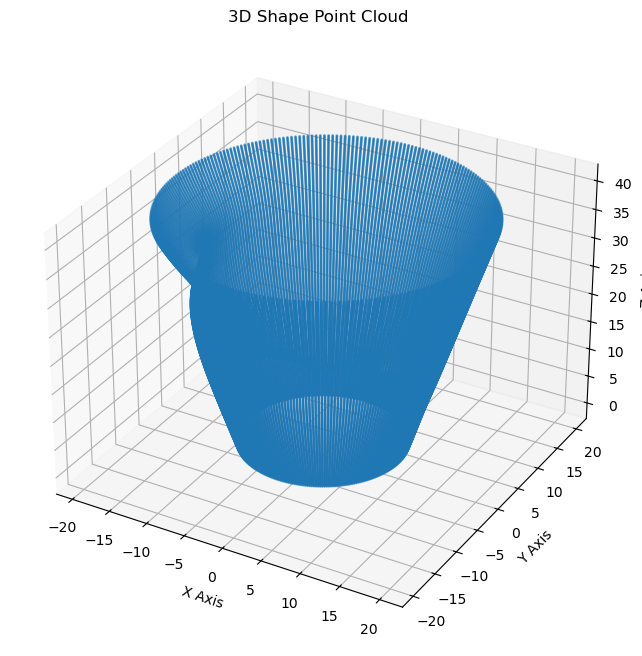

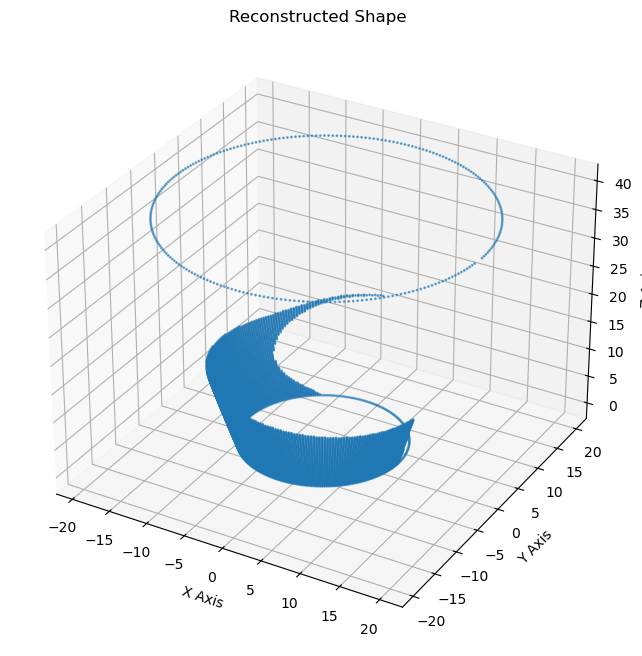

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

def load_point_cloud(file_path):
    data = np.load(file_path)
    return data["points"]

def visualize_point_cloud(points, title="3D Shape Point Cloud"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, alpha=0.6)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title(title)
    plt.show()

def detect_deformations(points):
    pca = PCA(n_components=3)
    transformed_points = pca.fit_transform(points)
    return transformed_points, pca.explained_variance_ratio_

def reconstruct_shape(points):
    hull = ConvexHull(points)
    reconstructed_points = points[hull.vertices]
    return reconstructed_points

if __name__ == "__main__":
    file_path = r"C:\Users\poler\Downloads\3d_shape_points_data.npz"
    points = load_point_cloud(file_path)
    visualize_point_cloud(points)
    transformed_points, variance_ratio = detect_deformations(points)
    reconstructed_points = reconstruct_shape(points)
    visualize_point_cloud(reconstructed_points, "Reconstructed Shape")